# Cardio Good Fitness Project

## Background:
Cardio Good Fitness retail store customers data on treadmill(TM) products.

## Objective:
To explore Cardio Good Fitness retail store customers dataset to identify differences between the customers of each product and the relationships between the different attributes of the customers.

## Questions:
1.	Come up with a customer profile (characteristics of a customer) of the different products
2.	Perform univariate and multivariate analyses
3.	Generate a set of insights and recommendations that will help the company in targeting new customers


## Data Description:
1.	Product - The model no. of the treadmill
2.	Age -  Age of the customer in no of years
3.	Gender - Gender of the customer
4.	Education - Education of the customer in no. of years
5.	Marital Status - Marital status of the customer
6.	Usage - Avg. # times the customer wants to use the treadmill every week
7.	Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8.	Income - Income of the customer
9.	Miles- Miles that a customer expects to run


In [5]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [7]:
data = pd.read_csv('CardioGoodFitness.csv')

In [8]:
# copying data to another varaible to avoid any changes to original data
df = data.copy()

In [9]:
# looking at head (5 observations) 
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [17]:
# looking at tail (5 observations) 
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


### Observations

* The product TM195 are of ages 18-20yrs, while product TM798 are of ages 40yrs and above
* Gender and marital status are categorical variable
* Education is a numeric variable
* Income increases with age
* Miles covered reduces with age


In [9]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

**Shape of dataset**

In [10]:
df.shape

(180, 9)

* The dataset has 180 rows and 9 columns

**Info()**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Observations**

* All columns have 180 observations no missing values in them
* Product,Gender and MaritalStatus should be categorical variables
* Product is read as 'object' datatype but it should have datatype string




# Data Preprocessing

**Fixing the data types**

In [13]:
# Product column should be converted to categorical data type
# categorical column should be converted to categorical type 
# (It reduces the data space required to store the dataframe, 
# every class in the categorical column will be represented by a number under the hood.
# This is useful during model building)

df['Product'] = df.Product.astype('category')
df['Gender'] = df.Gender.astype('category')
df['MaritalStatus'] = df.MaritalStatus.astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


There are 6 numeric columns that are integers and 3 categorical columns

**Check missing data**

In [18]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Summary of data**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


* Age of treadmill users are from 18-50yrs,and the average age is 15yrs 
* Customer Education is between 12-21yrs, with average age of 15yrs and maximum age of 21
* Average number of times the customer uses the treadmill every week is thrice, the least he will use the treadmill
  is twice a week and the maximum usage is 7 times a week
* Self rated fitness score of the customer is between 1.0 to 5.0, with mean fitness of 3.3 (5 - very fit, 1 - very unfit)
* Income increases with age; the least income is 29562k,Average income is 53719k and maximum is 104581k
* Customer runs average mile of 103km and maximum mile of360km every week

**By default the describe() function shows only the summary of numeric variables only.The summary of non-numeric variables are;**  

In [28]:
df.describe(exclude='number').T

,count,unique,top,freq
Product,180,3,TM195,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


**Check the count of each unique category in each of the categorical variables.**

In [32]:
#Making a list of all catrgorical variables 
cat_col=['Product','Gender','MaritalStatus']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print('-'*50)

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
--------------------------------------------------
Male      104
Female     76
Name: Gender, dtype: int64
--------------------------------------------------
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
--------------------------------------------------


* There are 3 uniquique products,TM195 is the highest purchased product with frequecy 80 and TM798 the least
   purchased with frequency 40
* There are two Gender; the Male taking the lead with a frequency of 104
* There 2 MaritalSatus with Partnered at the top with frequency 107

# EDA

**Exploring numerical variable first**

In [54]:
def histogram_boxplot(feature, figsize=(15,10), bins = 50):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram


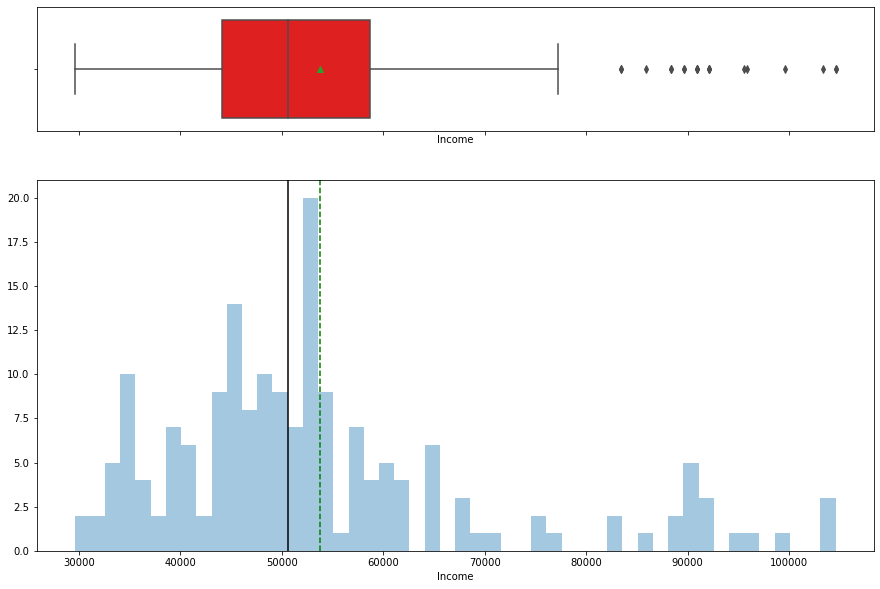

In [58]:
histogram_boxplot(df.Income)

* The distribution of Income is skewed to the right
* The mean is approximately 54k
* The median income is 51k
* Most of the customers earn less than 80k
* There are, however, outliers towards the right, indicating that visibility is low on some product.

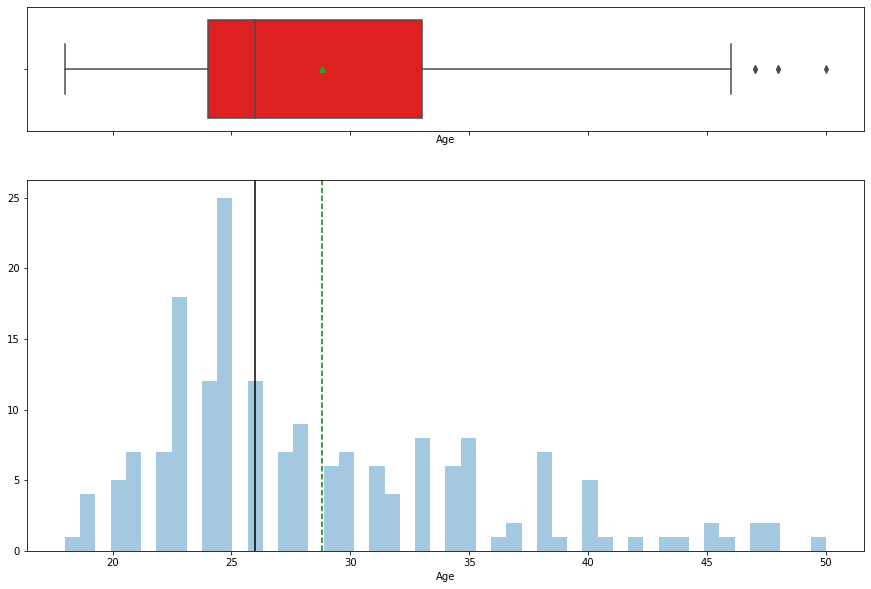

In [63]:
histogram_boxplot(df.Age)

* The Ages are skewed to the right
* The mean Age is approximately 29yrs
* The median Age is approximately 26yrs
* There are few outliers towards the right
* Younger people buy the product most

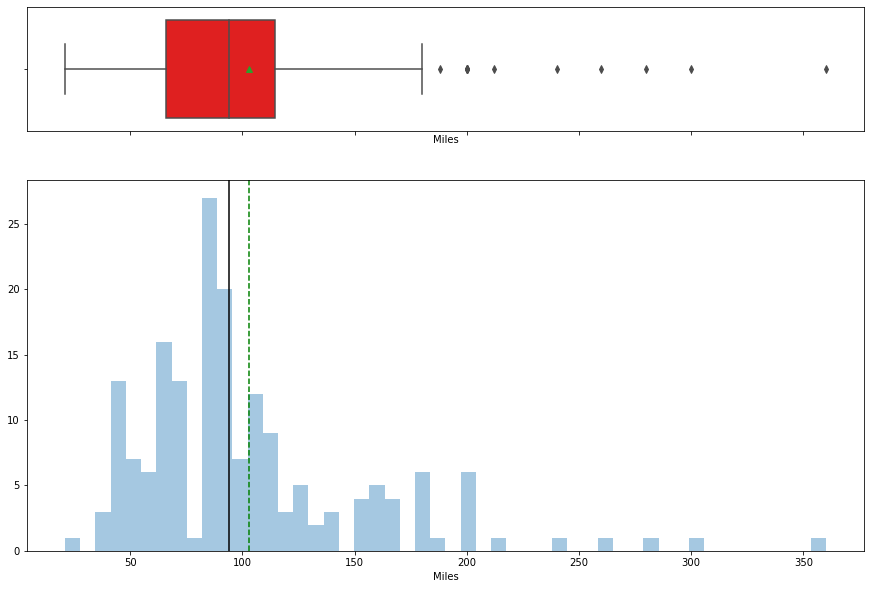

In [64]:
histogram_boxplot(df.Miles)

* The average mile is approximately 103km to be run every weeek
* The median mile covered is approximatly 98km
* It is highly skewd to the right

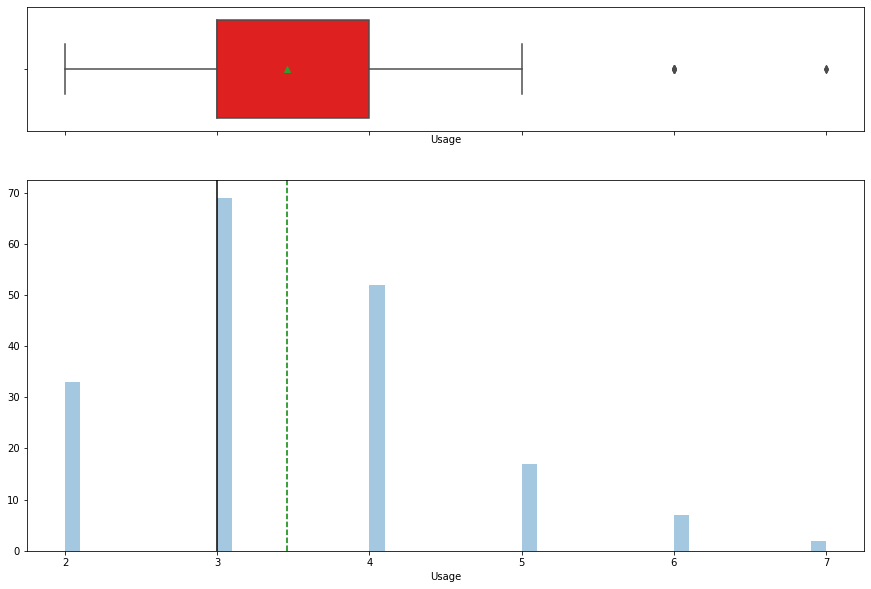

In [71]:
histogram_boxplot(df.Usage)

* The product average usage per week is approximately 3 to 4 days
* The product usage is skewe to the right

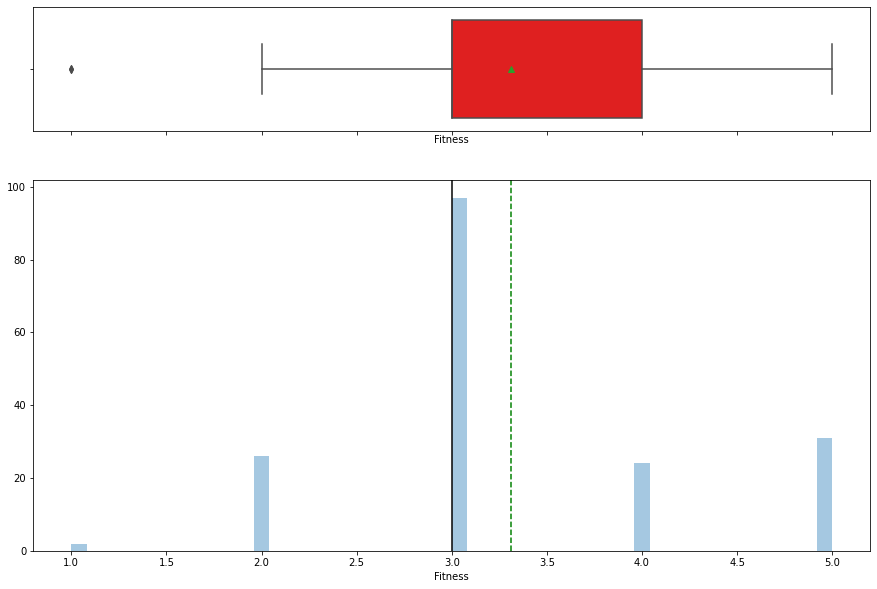

In [75]:
histogram_boxplot(df.Fitness)

* The average fitness score of the customer is approximately 3.3
* slight skewness to the left

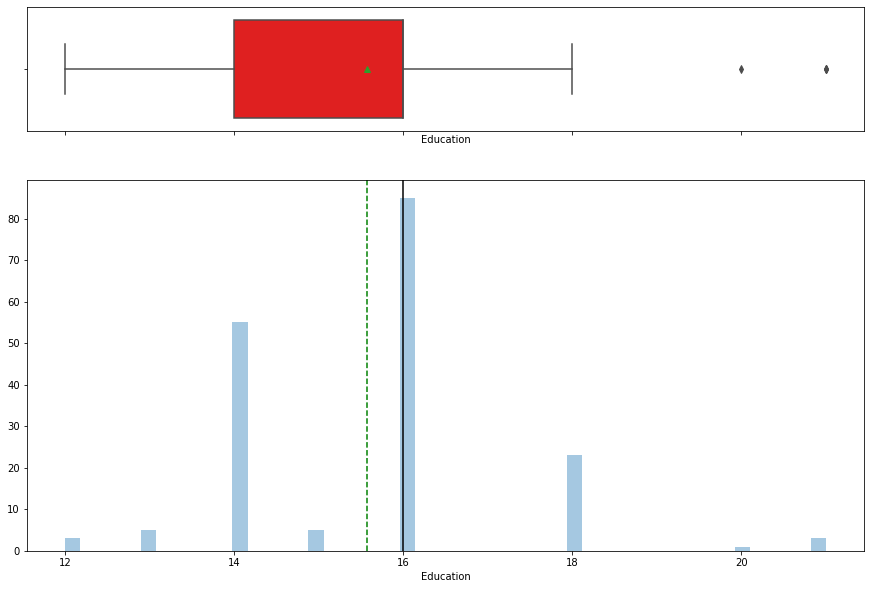

In [78]:
histogram_boxplot(df.Education)

* The median age of the Educated customers are 16yrs
* Few outliers to the right

## Exploring categorical variables

In [81]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

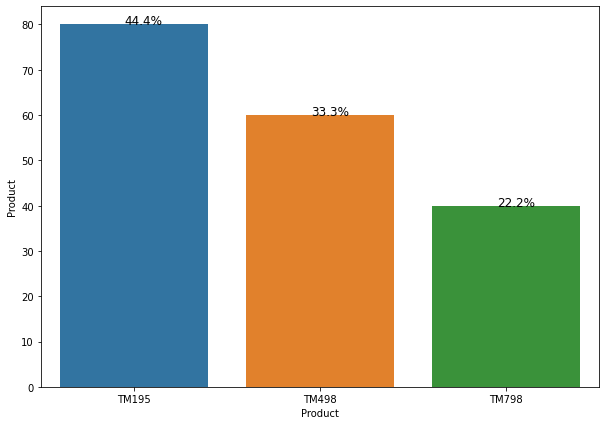

In [82]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Product'])
plt.xlabel('Product')
plt.ylabel('Product')
bar_perc(ax,df['Product'])

* Customers buy only 22.2% of TM798 threadmill product which is the least
* The highest bought product is TM195 with 44.4%

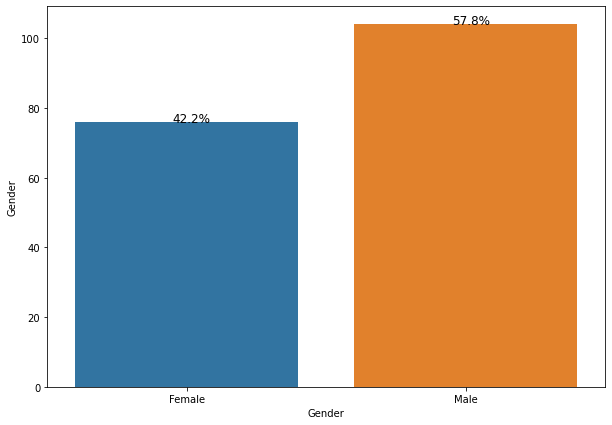

In [84]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Gender')
bar_perc(ax,df['Gender'])

* Males bought products more than femaales with 57.8%

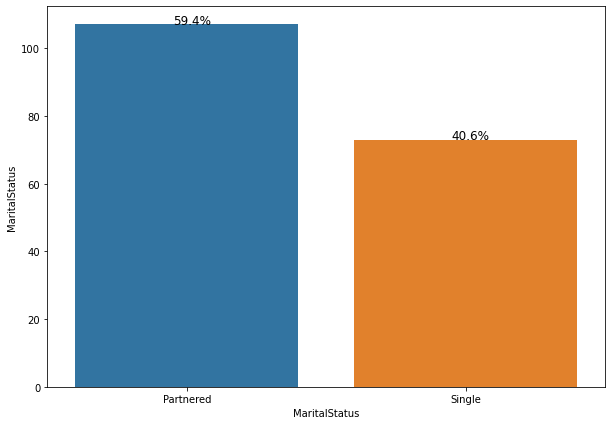

In [85]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['MaritalStatus'])
plt.xlabel('MaritalStatus')
plt.ylabel('MaritalStatus')
bar_perc(ax,df['MaritalStatus'])

* Married people bought products more than sigles with 59.4%

## Bivariate Analysis

**Plot bivariate charts between variables to understand their interaction with each other.**

<AxesSubplot:>

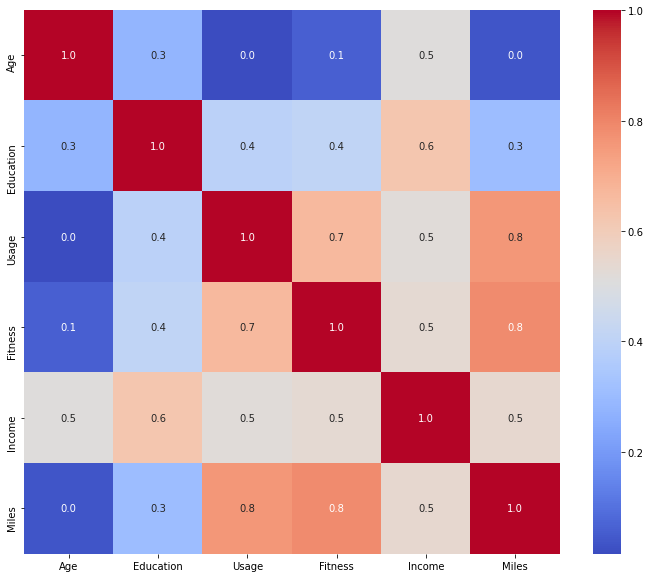

In [88]:
# Check for correlation among numerical variables
num_var = ['Age','Education','Usage','Fitness','Income', 'Miles']

corr = df[num_var].corr()

# plot the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

* There is small correlation between income and Education
* Fitness and Miles are corelated
* There is negative correlation between Usage and Miles
* No corelation between Usage and Fitness
* Age and Usage are negatively corelated

### Bivariate Scatter Plots

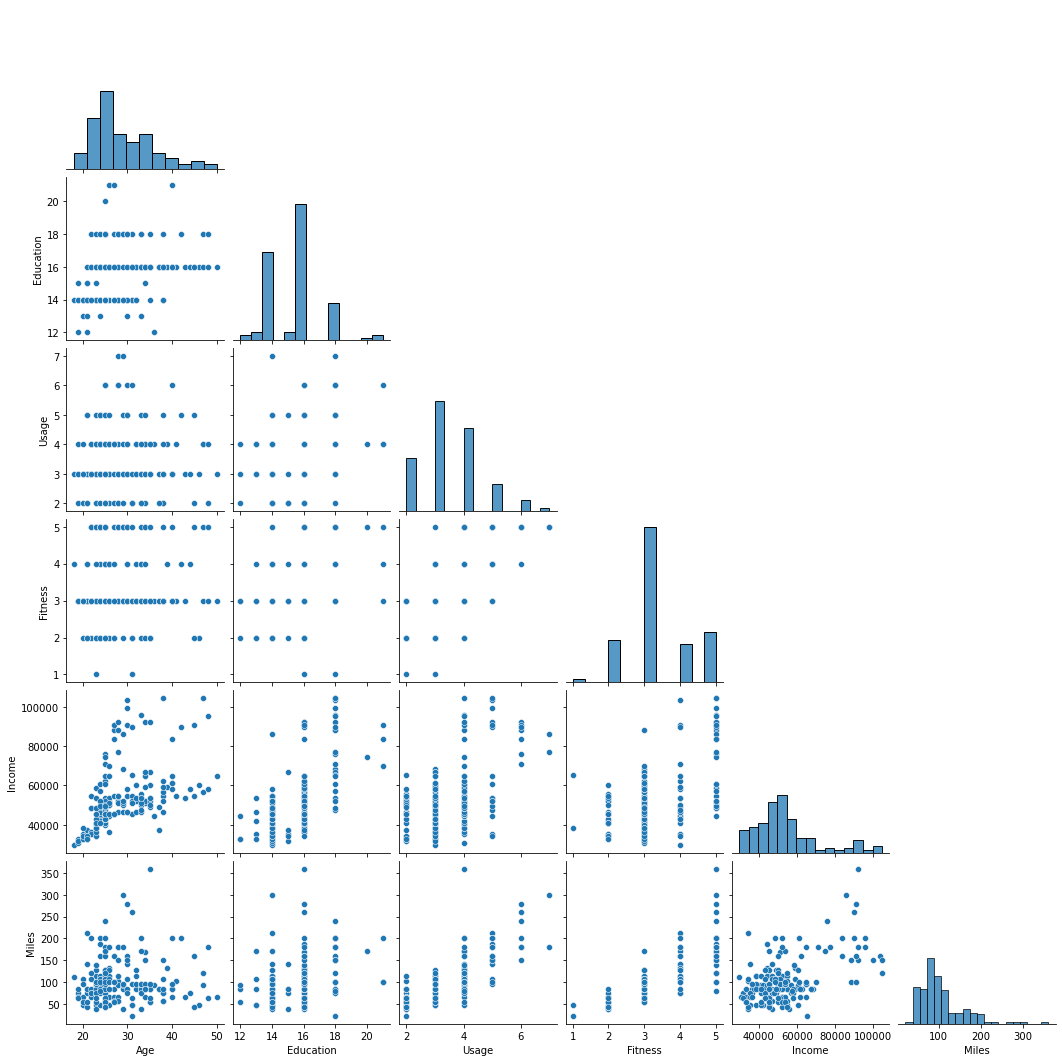

In [90]:
sns.pairplot(df[num_var], corner=True)
plt.show()

* We get the same observation as from correlation plot

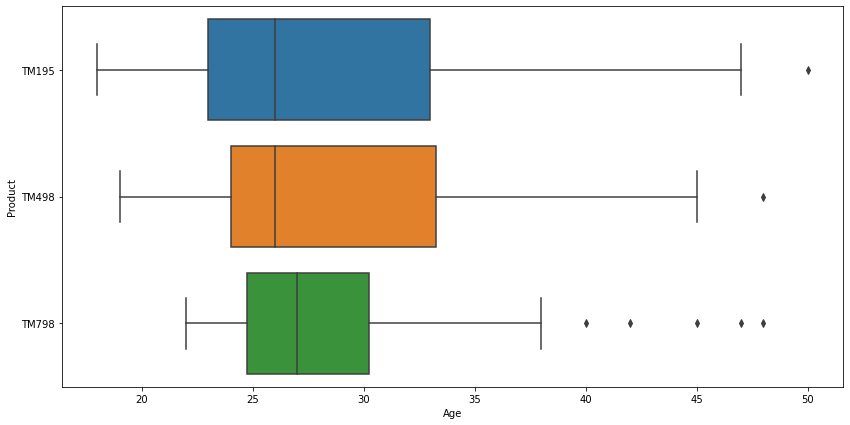

In [93]:
plt.figure(figsize=(14,7))           
sns.boxplot(df['Age'],df['Product'])
plt.ylabel('Product')
plt.xlabel('Age')
plt.show()

* TM798 has outliers, customers are more than 40yrs
* Ages 23 to 34yrs bought T198 and TM498, while Ages 25-30yrs bought TM798

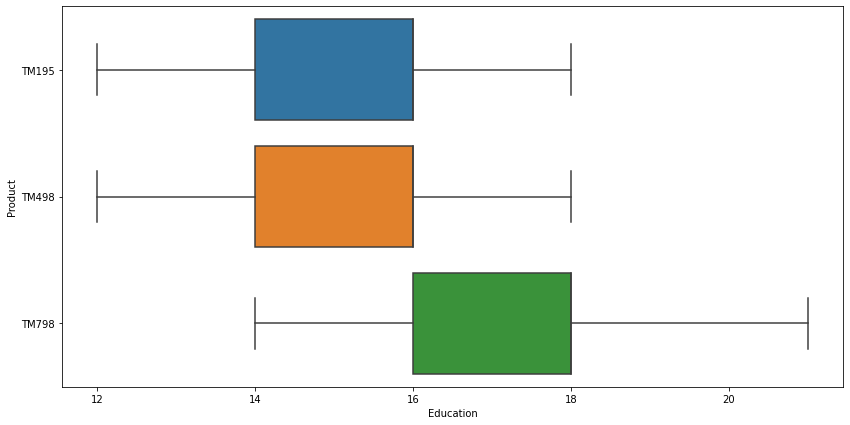

In [94]:
plt.figure(figsize=(14,7))           
sns.boxplot(df['Education'],df['Product'])
plt.ylabel('Product')
plt.xlabel('Education')
plt.show()

* Customers with higher Education, ages 16-18yrs bought TM798
* Customers with lower Education, ages 14-15yrs bout Tm195 and TM498

* Ages 14-16yrs bought TM195 and TM498, while Ages 16-18yrs bought TM798

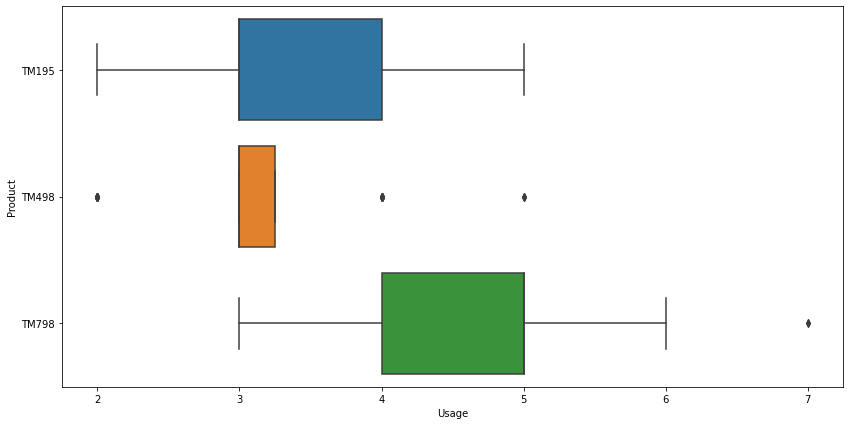

In [95]:
plt.figure(figsize=(14,7))           
sns.boxplot(df['Usage'],df['Product'])
plt.ylabel('Product')
plt.xlabel('Usage')
plt.show()

* Customers that bought TM798 used it 4 to 5 times a week
* Customers that bought TM498 used it 3 times a week
* Customers that bought TM195 used it3 to 4 times a week

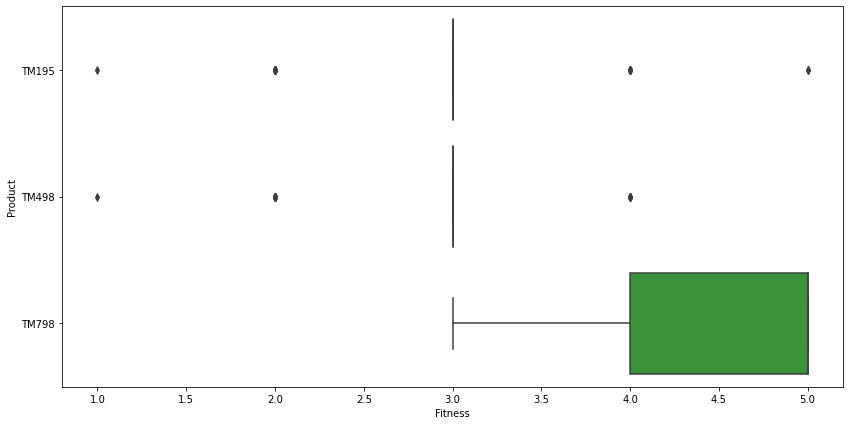

In [96]:
plt.figure(figsize=(14,7))           
sns.boxplot(df['Fitness'],df['Product'])
plt.ylabel('Product')
plt.xlabel('Fitness')
plt.show()

* Only customers of ages 40 to 50yrs that bought TM798 got fitness

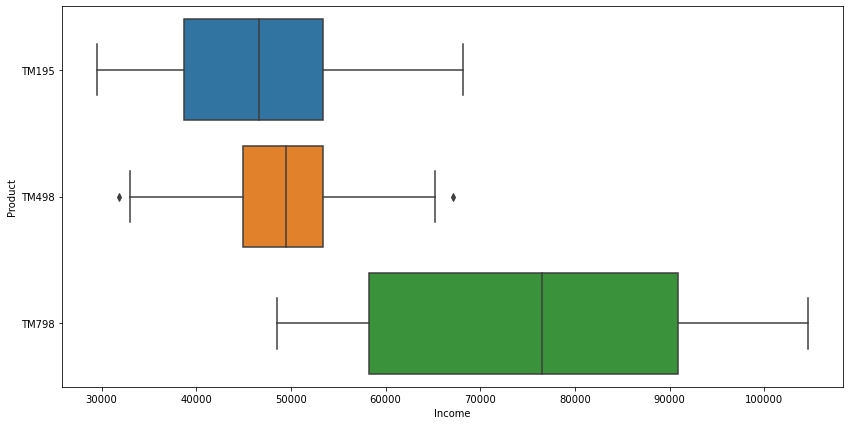

In [97]:
plt.figure(figsize=(14,7))           
sns.boxplot(df['Income'],df['Product'])
plt.ylabel('Product')
plt.xlabel('Income')
plt.show()

* Customers with high income, 60k and above bought TM798
* Customers with low income less than 60k bought TM195 and TM498

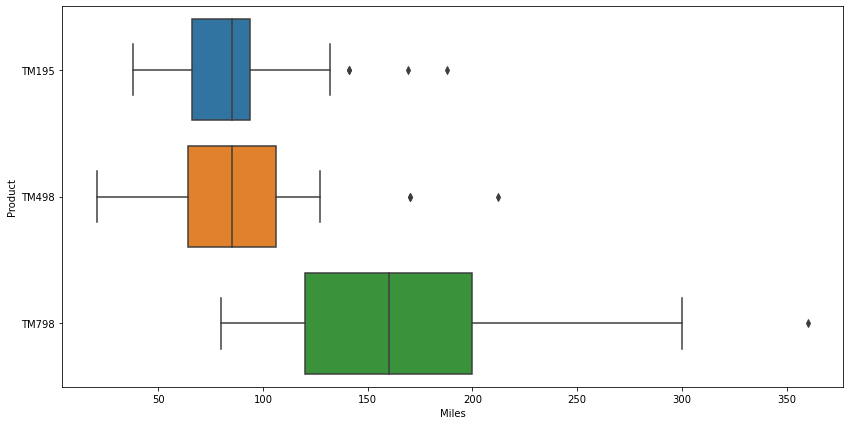

In [98]:
plt.figure(figsize=(14,7))           
sns.boxplot(df['Miles'],df['Product'])
plt.ylabel('Product')
plt.xlabel('Miles')
plt.show()

* Customers who bought TM195 covered approximately 60 to 80km a week
* Those who bought TM498 covered approximately 60 to 110km per week
* Distances 120 to 200km was covered by customers who bought TM798 which is the highest distance covered

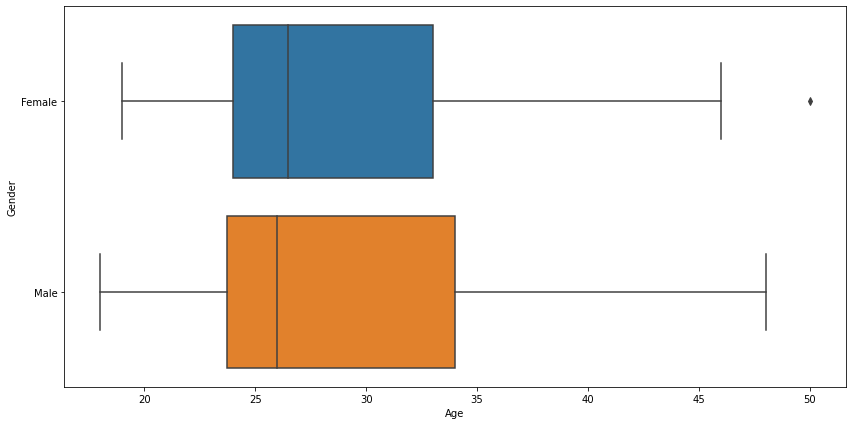

In [103]:
plt.figure(figsize=(14,7))           
sns.boxplot(df['Age'],df['Gender'])
plt.ylabel('Gender')
plt.xlabel('Age')
plt.show()

* Males of Ages 23 to 34yrs purchased more threadmills than females

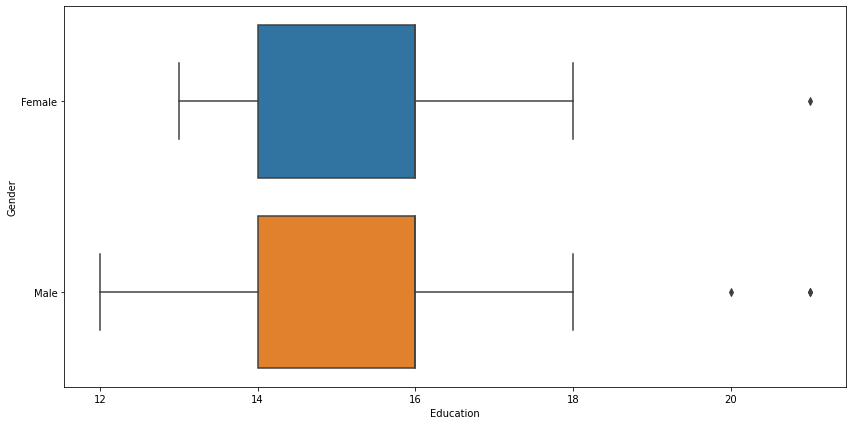

In [104]:
plt.figure(figsize=(14,7))           
sns.boxplot(df['Education'],df['Gender'])
plt.ylabel('Gender')
plt.xlabel('Education')
plt.show()

* Both male and female are in the same class of Education

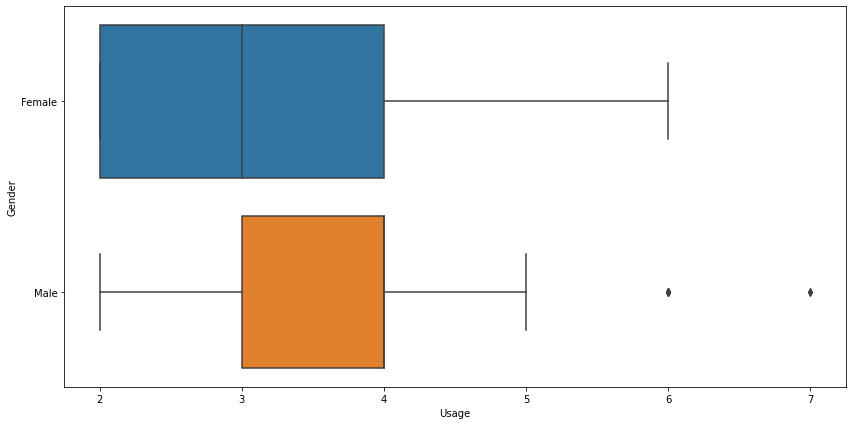

In [105]:
plt.figure(figsize=(14,7))           
sns.boxplot(df['Usage'],df['Gender'])
plt.ylabel('Gender')
plt.xlabel('Usage')
plt.show()

* Average number of females that used threadmill in a week is 2 to 4 times
* Males used 3 to 4 times in the week

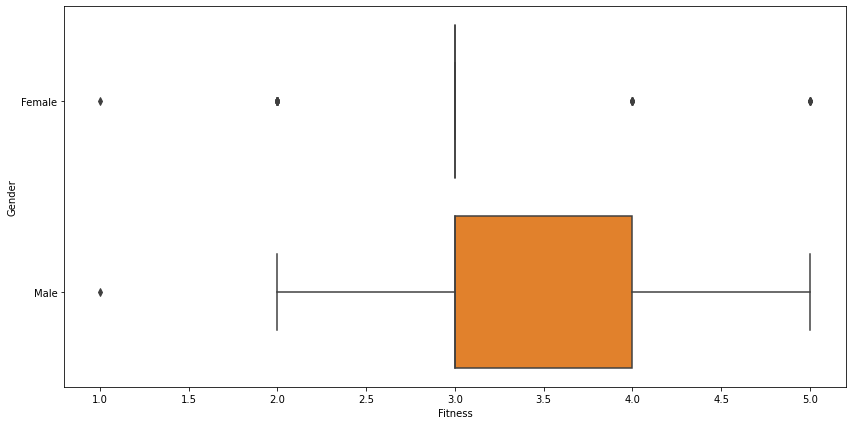

In [106]:
plt.figure(figsize=(14,7))           
sns.boxplot(df['Fitness'],df['Gender'])
plt.ylabel('Gender')
plt.xlabel('Fitness')
plt.show()

* Only males got fitness score of 3 to 4 in a week
* There were outliers throughout in the fitness by famales

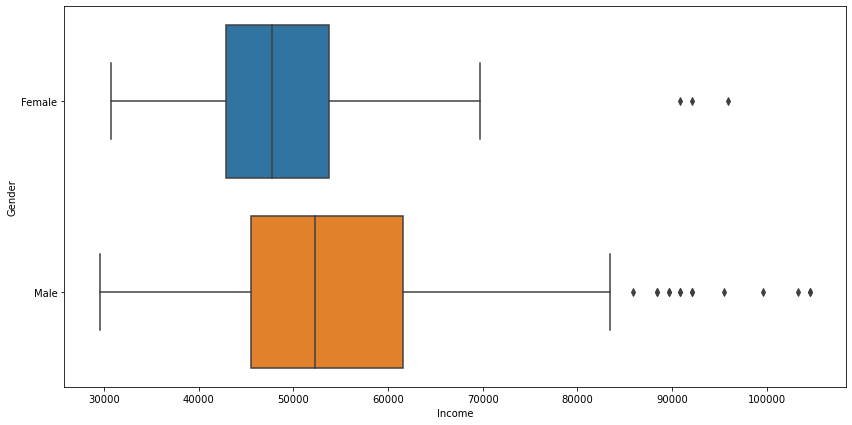

In [110]:
plt.figure(figsize=(14,7))           
sns.boxplot(df['Income'],df['Gender'])
plt.ylabel('Gender')
plt.xlabel('Income')
plt.show()

* Males had more Income than females

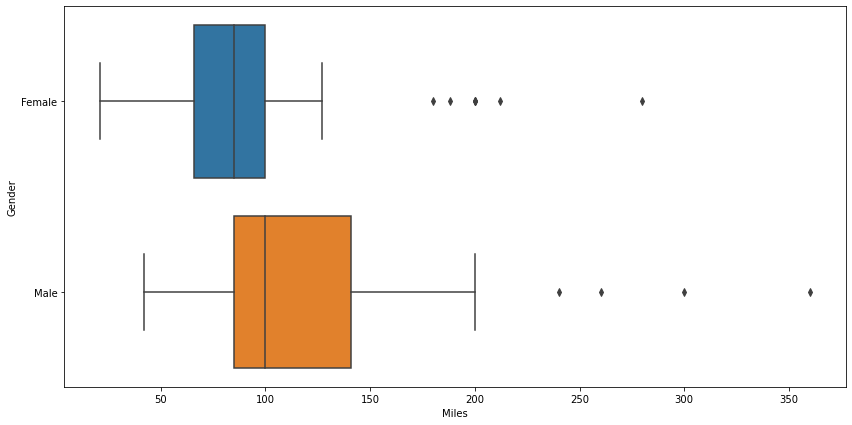

In [107]:
plt.figure(figsize=(14,7))           
sns.boxplot(df['Miles'],df['Gender'])
plt.ylabel('Gender')
plt.xlabel('Miles')
plt.show()

* Men covered more distance of 90 to 140km per week
* Females covered a short distance 30 to 100km per week


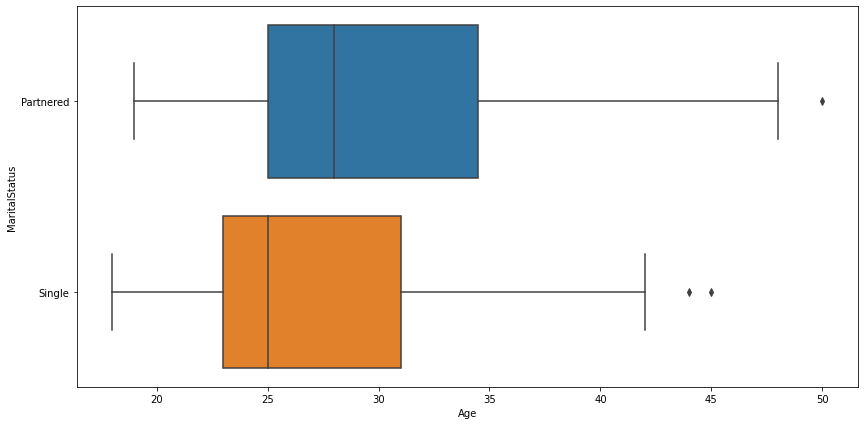

In [108]:
plt.figure(figsize=(14,7))           
sns.boxplot(df['Age'],df['MaritalStatus'])
plt.ylabel('MaritalStatus')
plt.xlabel('Age')
plt.show()

* Ages 25 to 35yrs were married people, which is more than single

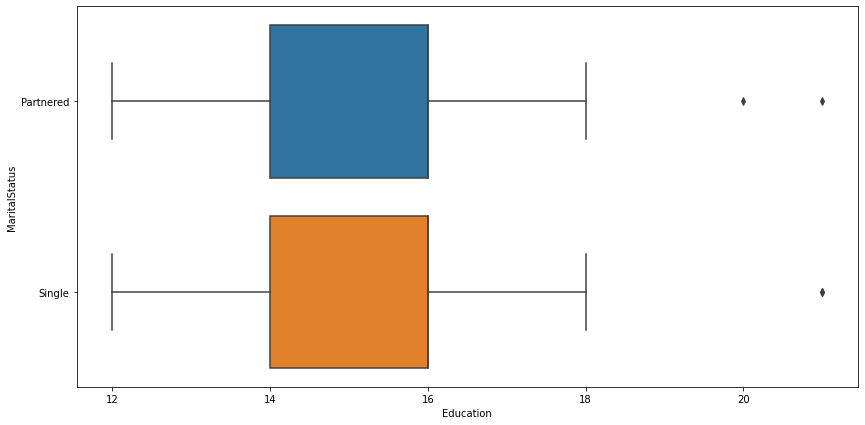

In [109]:
plt.figure(figsize=(14,7))           
sns.boxplot(df['Education'],df['MaritalStatus'])
plt.ylabel('MaritalStatus')
plt.xlabel('Education')
plt.show()

* Both partnered and sigles are in the same class of Education

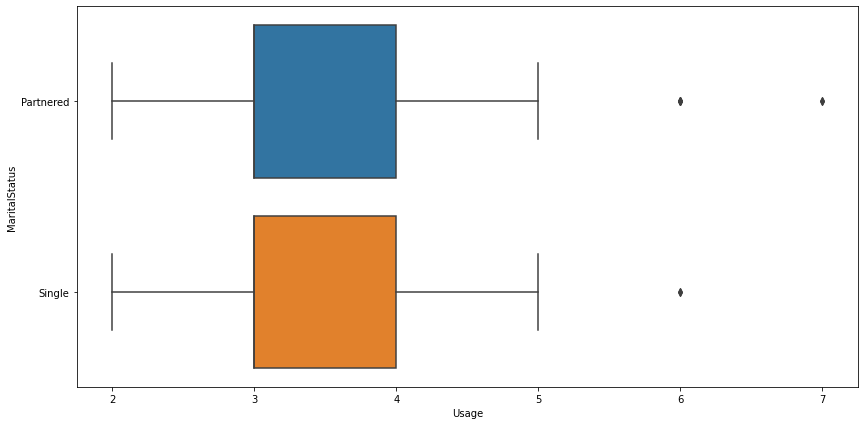

In [111]:
plt.figure(figsize=(14,7))           
sns.boxplot(df['Usage'],df['MaritalStatus'])
plt.ylabel('MaritalStatus')
plt.xlabel('Usage')
plt.show()

* The usage of threadmills product are same for both married and single

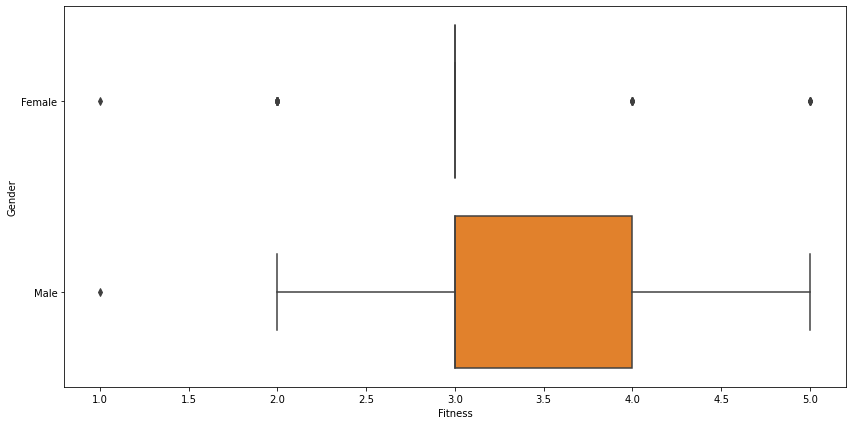

In [112]:
plt.figure(figsize=(14,7))           
sns.boxplot(df['Fitness'],df['Gender'])
plt.ylabel('Gender')
plt.xlabel('Fitness')
plt.show()

* Only males got fitness in threadmills product bought

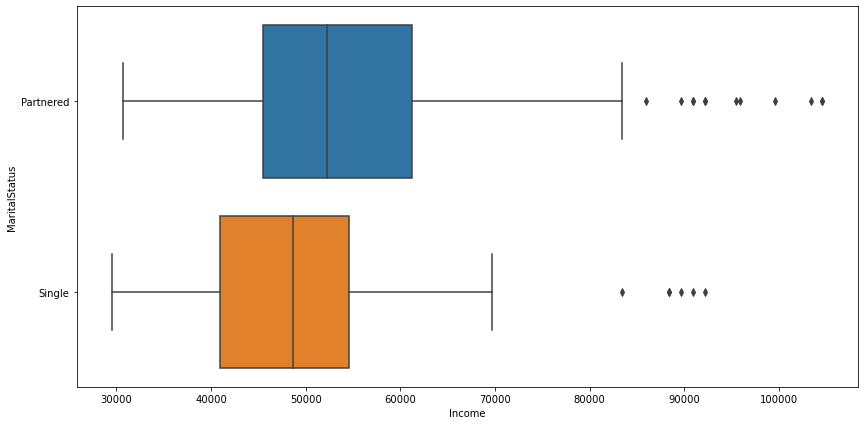

In [114]:
plt.figure(figsize=(14,7))           
sns.boxplot(df['Income'],df['MaritalStatus'])
plt.ylabel('MaritalStatus')
plt.xlabel('Income')
plt.show()

* The partnered people has more Income than the singles

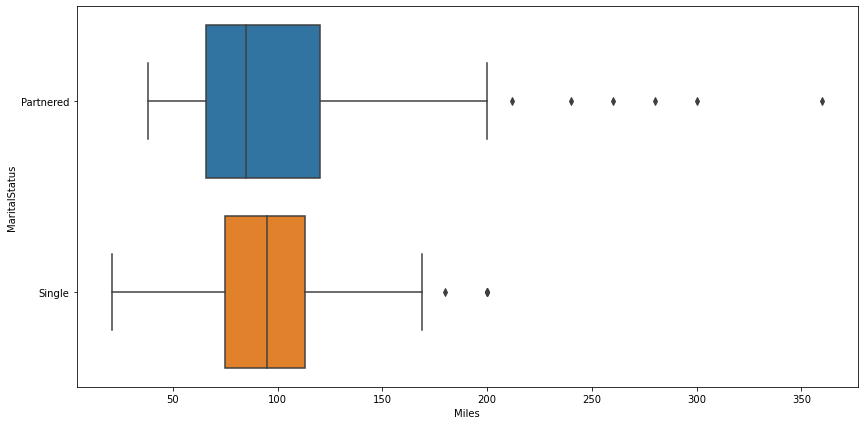

In [115]:
plt.figure(figsize=(14,7))           
sns.boxplot(df['Miles'],df['MaritalStatus'])
plt.ylabel('MaritalStatus')
plt.xlabel('Miles')
plt.show()

* Partnered people covered more miles than the singles

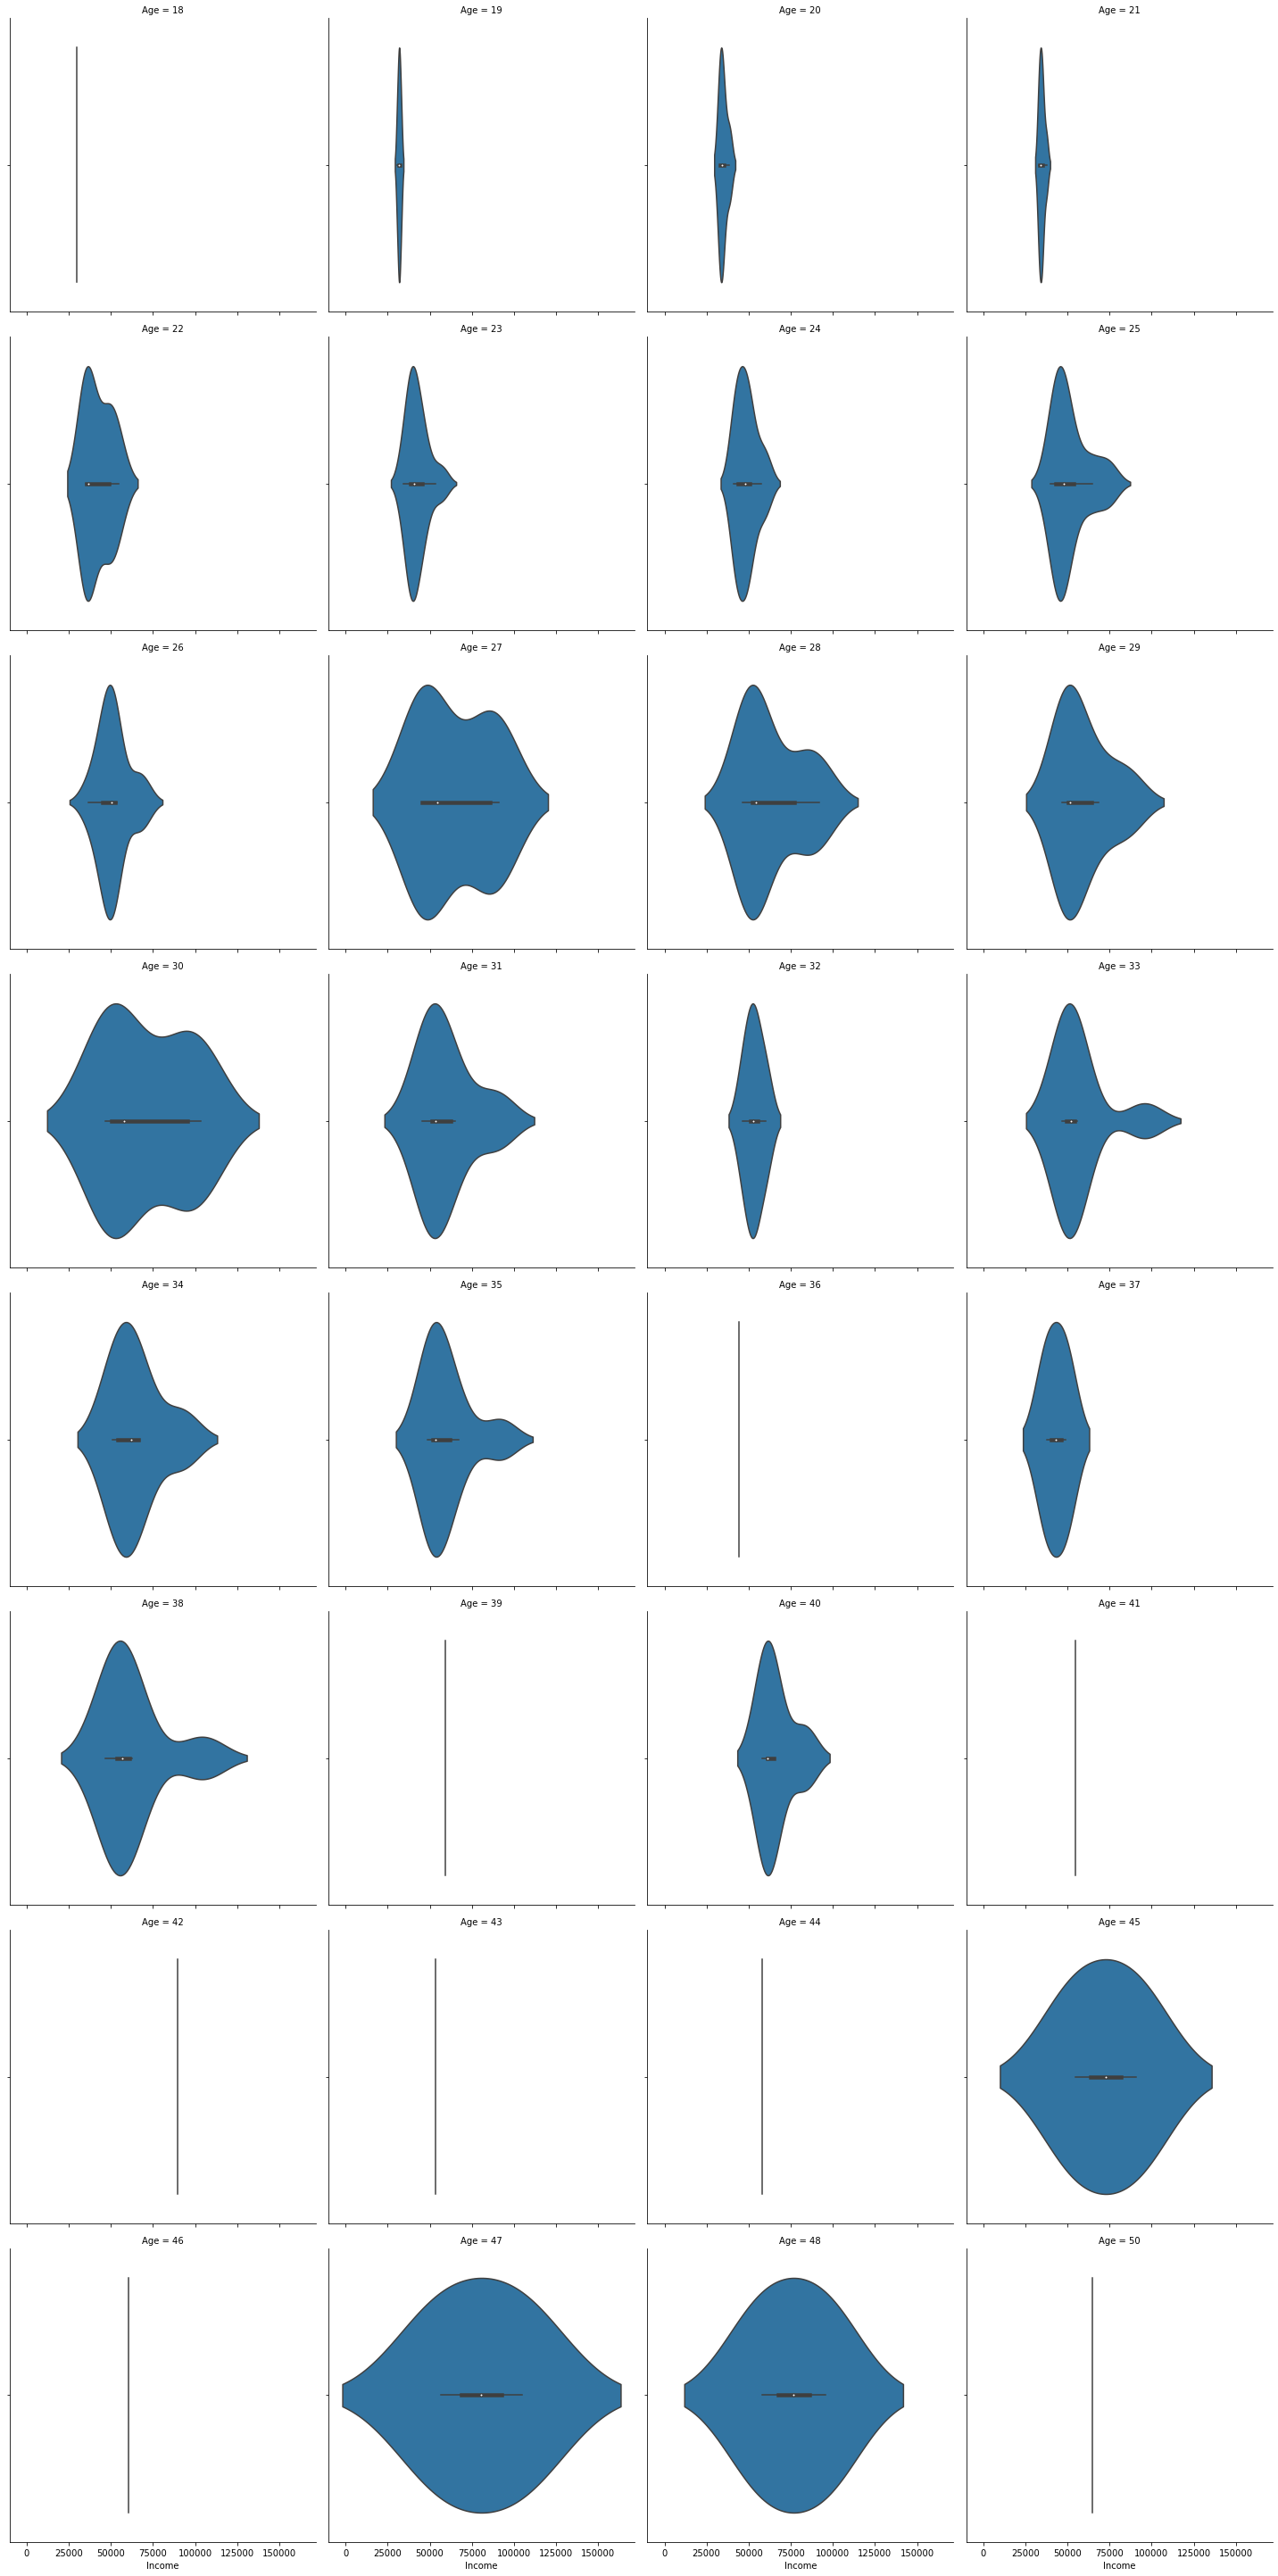

In [122]:
# Dispersion of pickups in every borough
sns.catplot(x='Income',
             col='Age', 
             data=df,
             col_wrap=4,
             kind="violin")

* Income grows with Age

**Relationship between Product and Income**

In [125]:
df.groupby('Product')['Income'].mean()

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

* TM798 made more sales than other products

In [129]:
# Check if the trend is similar across 
df.groupby(by = ['Product','Age'])['Education','Usage','Fitness','Income','Miles'].mean()

Education  Usage  Fitness    Income       Miles
Product Age                                                 
TM195   18   14.000000   3.00     4.00   29562.0  112.000000
        19   13.666667   3.00     3.00   31836.0   75.333333
        20   13.500000   3.50     2.50   34110.0   56.500000
        21   14.250000   3.25     3.25   35247.0   96.500000
        22   14.500000   3.25     2.75   35815.5   75.250000
...                ...    ...      ...       ...         ...
TM798   45   16.000000   5.00     5.00   90886.0  160.000000
        46         NaN    NaN      NaN       NaN         NaN
        47   18.000000   4.00     5.00  104581.0  120.000000
        48   18.000000   4.00     5.00   95508.0  180.000000
        50         NaN    NaN      NaN       NaN         NaN

[96 rows x 5 columns]

* TM195 has relationship across all
* TM498 has no relationship with others
* TM798 has some missing relationships

## Multivariate Analysis

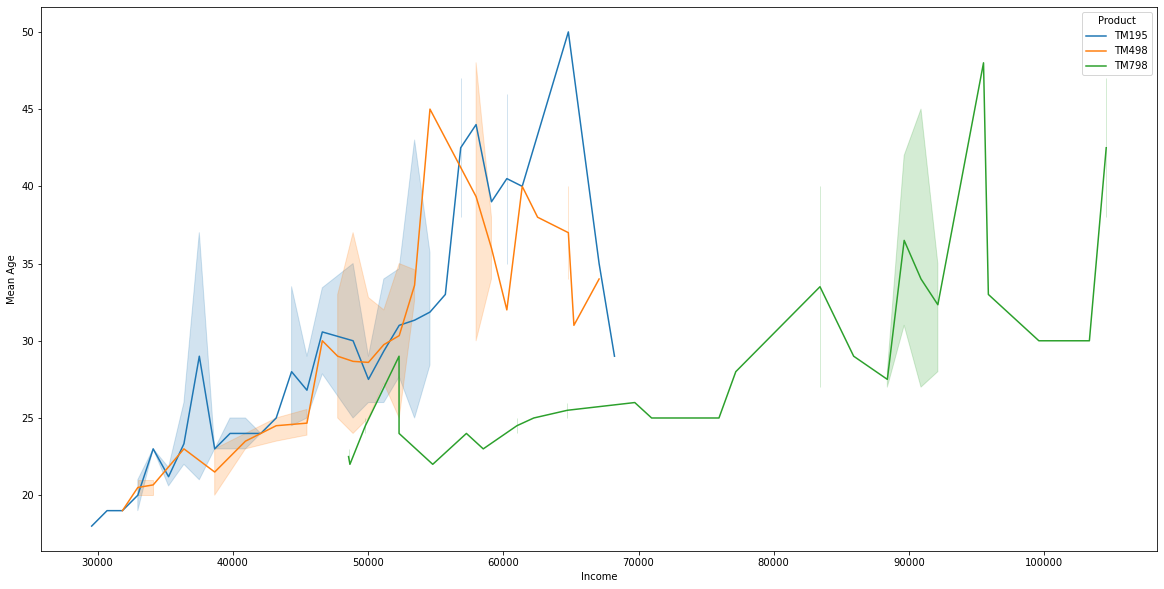

In [131]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Income", y="Age", ci=95, data=df, hue='Product')
plt.ylabel('Mean Age')
plt.xlabel('Income')
plt.show()

* High earners bought TM798
* Low earners bought TM195 and TM498

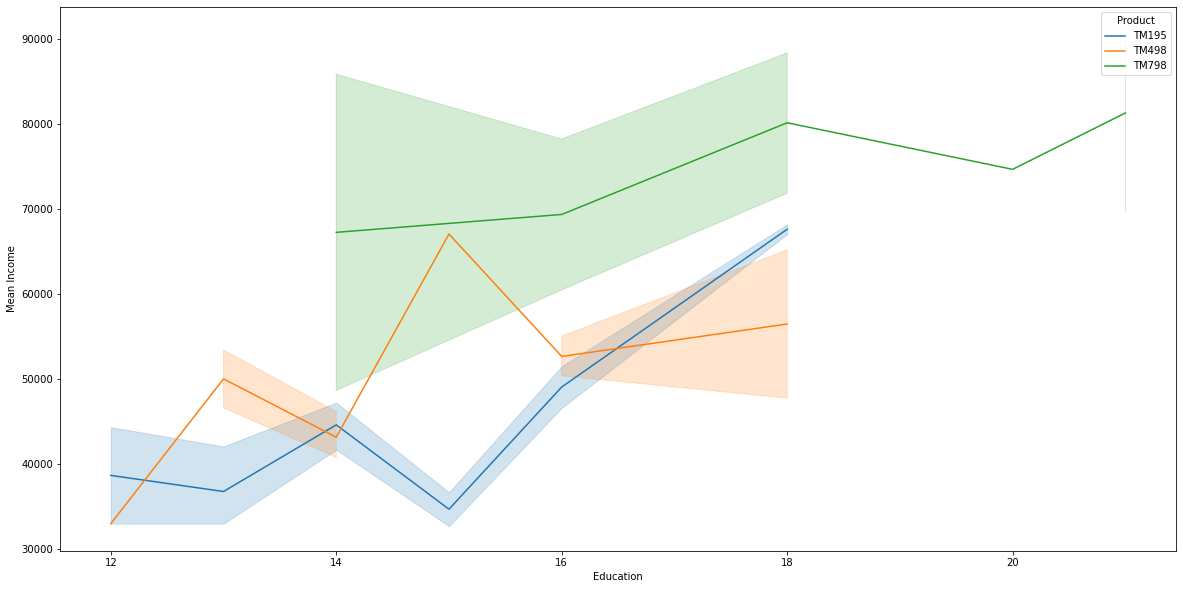

In [135]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Education", y="Income", ci=95, data=df, hue='Product')
plt.ylabel('Mean Income')
plt.xlabel('Education')
plt.show()

* The highly Educated and top earners got TM798
* Education and Income are correlated

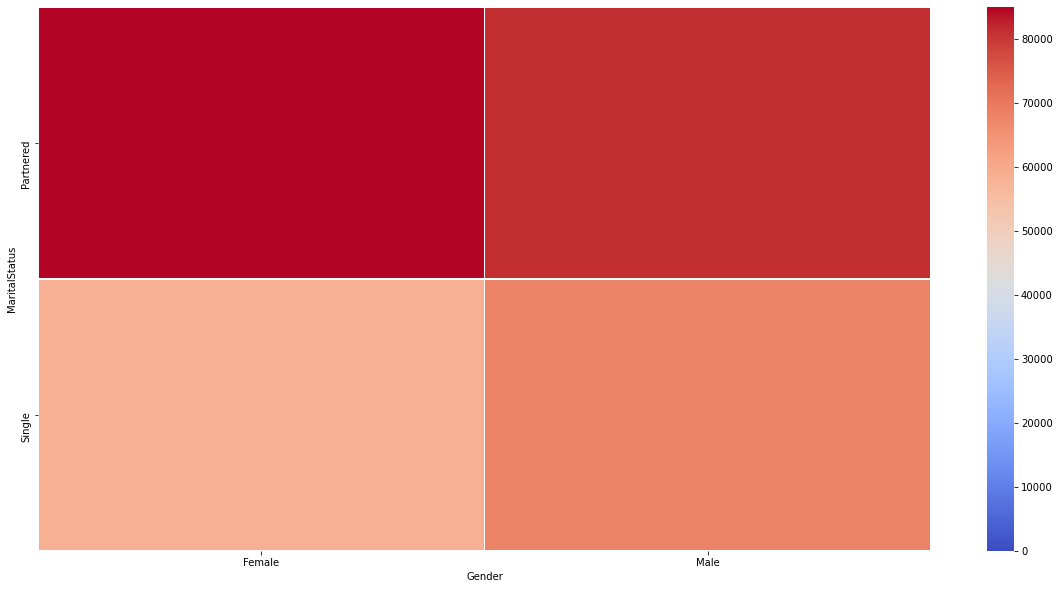

In [140]:
df_man = df[df.Product=='TM798']
df_hm =df_man.pivot_table(index = 'MaritalStatus',columns ='Gender',values ='Income')
# Draw a heatmap 
plt.figure(figsize = (20,10)) # To resize the plot
sns.heatmap(df_hm,  fmt="d", cmap='coolwarm', linewidths=.5, vmin=0)
plt.show()

* Married males are the top earners that bought TM798

## Pandas Profiling

In [142]:
import sys
!{sys.executable} -m pip install pandas-profiling


  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=4e9063778a7cfdaaae68067fe6c21b4e1d2b247433c6c4e254797026fdd60fb9
  Stored in directory: c:\users\betty\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=a4779907eea36f952dee567e36516011427f8d39cf5ca2f76052e721f69a5fad
  Stored in directory: c:\users\betty\appdata\local\pip\cache\wheels\48\a1\7f\096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74
Successfully built htmlmin imagehash


In [145]:
#import pandas_profiling
import pandas_profiling 


In [146]:
df = pd.read_csv('CardioGoodFitness.csv')

In [147]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [148]:
pandas_profiling.ProfileReport(df).to_file("output.html")

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Conclusions

* 44.4% customers brought TM195
* The most purchased threadmill product was TM195, it has relationship across all columns. 
* TM498 does not have a relationship across all columns
* The least purchased threadmill product was TM798 
* 57.8% male brought treadmill products
* 59.4% partnered people bought threadmills
* There are more Male customers than Female customers
* Male customers are the high Income customers
* Threadmill usage are mainly used by male
* Younger customers buy more threadmills with average age of 28, median is 26 and mode is 25
* Most of the customers are low earners with less than 60K Income 
* The mean age of Education is 16 and median 18
* Both males and females are educated

## Recommendations

* Product TM798 should be marketed with a discount to attract customers and increase sales
* Product TM195 attracts most customers with low income, this product can upgraded to attract both high Income earners to increase sales
* To attract females with threadmills products we should have Women campaign to educate women on the use of these products for fitness
* We can also give them bonus, buy two take one free
* Campaign should be organised for the aged ones above 35yrs as bodily exercise is profitable
* We can employ more sales team to market threadmills product